# Linear Regression

Linear Regression is a statistical method that models the relationship between a dependent variable (Y) and one or more independent variables (X) using a straight line.

## Equation

#### For a single variable (simple linear regression):

𝑌 = 𝛽0 + 𝛽1𝑋 + 𝜀

Where:

𝑌 = Dependent variable (target)
𝑋 = Independent variable (feature)
𝛽0 = Intercept
𝛽1 = Slope (coefficient)
𝜀 = Error term

#### For multiple variables (multiple linear regression):

Y=β0​ + β1​X1​ + β2​X2​ +...+ βn​Xn​ + ε

#### Some of the applications

- Predicting house prices based on features like size and location
- Estimating sales based on advertising spend
- Forecasting stock prices. 

## Case Study: Predicting House Prices using Linear Regression

### 1. Problem Definition

#### Business Problem
A real estate company wants to predict median house prices in California based on various features such as income levels, house age, and location.

#### ML Problem

Given a dataset of past house sales, we aim to build a Linear Regression model that predicts median a house price based on key features.

#### Objective

- Build a Linear Regression model to estimate house prices.
- Identify key features affecting house prices.
- Evaluate model performance using Mean Squared Error (MSE) and R² score.



### 2. Data Collection 

The California Housing dataset contains information on housing prices for California districts from the 1990 census:

- MedInc – Median income in the area
- HouseAge – Average age of houses
- AveRooms – Average number of rooms per household
- AveOccup – Average number of occupants per household
- Latitude/Longitude – Location of houses
- MedHouseVal – House price (Target variable)

In [32]:
# loading the data in Python

from sklearn.datasets import fetch_california_housing
import pandas as pd

california = fetch_california_housing()

print (type(california))

df = pd.DataFrame(california.data, columns=california.feature_names)

df["PRICE"] = california.target # Add target variable (house price)

df.head()



<class 'sklearn.utils._bunch.Bunch'>


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### 3. Data Preprocessing

In [13]:
# Check for missing values

print(df.isnull().sum())

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
PRICE         0
dtype: int64


In [15]:
# Check data types

print(df.dtypes)

MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
PRICE         float64
dtype: object


### 4. Exploratory Data Analysis (EDA)

In [34]:
print(df.describe())

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude         PRICE  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

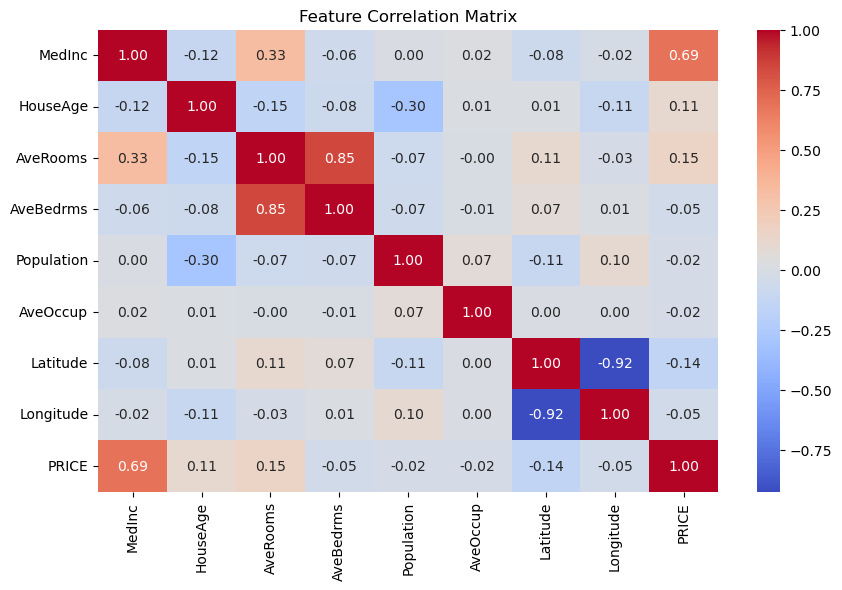

In [36]:
# Correlation Analysis - Checking how features relate to house prices.

import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df.corr()

# Visualizing correlation with heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()


### 5: Feature Engineering

In [38]:
# Based on correlation, we select key features:

selected_features = ["MedInc", "HouseAge", "AveRooms", "AveOccup", "Latitude", "Longitude"]

X = df[selected_features]

y = df["PRICE"]


In [40]:
# Feature Scaling - Standardizing the features to improve model performance.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X) # Z-score normalization, with mean = 0 and standard deviation = 1

print(X_scaled)


[[ 2.34476576  0.98214266  0.62855945 -0.04959654  1.05254828 -1.32783522]
 [ 2.33223796 -0.60701891  0.32704136 -0.09251223  1.04318455 -1.32284391]
 [ 1.7826994   1.85618152  1.15562047 -0.02584253  1.03850269 -1.33282653]
 ...
 [-1.14259331 -0.92485123 -0.09031802 -0.0717345   1.77823747 -0.8237132 ]
 [-1.05458292 -0.84539315 -0.04021111 -0.09122515  1.77823747 -0.87362627]
 [-0.78012947 -1.00430931 -0.07044252 -0.04368215  1.75014627 -0.83369581]]


### 6. Model selection

Since we are predicting continuous values, we choose Linear Regression.

In [42]:
# Splitting Data into Train & Test Sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


### 7. Model Training & Testing

In [88]:

# Training the Model

from sklearn.linear_model import LinearRegression

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

print(model)

#print ("Intercept (b0):", model.intercept_)
#print("Slope (b1):", model.coef_[1])
# Making Predictions

y_pred = model.predict(X_test)

#print(X_test)
#print(y_pred)

test_datapred =pd.DataFrame ({'Actual Y': y_test.values, 'Predicted Y': y_pred})

print(test_datapred)



LinearRegression()
      Actual Y  Predicted Y
0      0.47700     0.735248
1      0.45800     1.750837
2      5.00001     2.471639
3      2.18600     2.884135
4      2.78000     2.713436
...        ...          ...
4123   2.63300     2.195039
4124   2.66800     2.361232
4125   5.00001     4.444927
4126   0.72300     1.303233
4127   1.51500     1.893324

[4128 rows x 2 columns]


### 8. Model Evaluation

In [48]:
# Evaluating performance

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error: 0.55
Root Mean Squared Error: 0.74
R² Score: 0.58


Interpreting Metrics:

- Lower MSE & RMSE = Better model performance.
- R² Score (~0.6 - 0.7) = Model explains 60-70% of the variance in house prices.

#### Visualizing Predictions

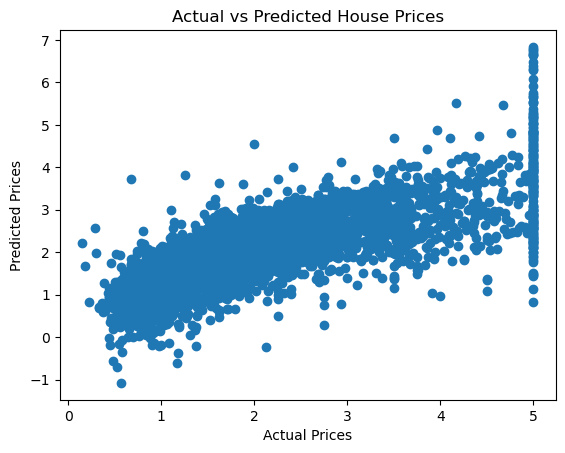

In [51]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()


Observations:

- If the points align along the diagonal, the model is making good predictions.
- If they are scattered widely, we may need feature engineering or a more complex model.

# Practice Exercise 

The Air Quality Dataset contains 9,358 records of air pollution levels, weather conditions, and gas concentrations. These practice exercises will help you apply Linear Regression concepts in a real-world context.

### Q1. Load the dataset, inspect its structure, and clean missing values

Tasks:
- Load the dataset into a Pandas DataFrame.
- Inspect the dataset – Check the first five rows.
- Check for missing values and decide on an appropriate handling method.
- Check data types and convert columns if needed.
- Drop unnecessary columns (e.g., timestamps if not used in modeling).

### Q2. Perform EDA to understand relationships between variables

Tasks:
- Compute summary statistics (describe()).
- Plot distributions of key features (e.g., CO(GT), NO2(GT), Temperature).
- Create a correlation matrix to analyze relationships between features.
- Visualize correlations using a heatmap.

### Q3. Identify the most relevant features for predicting Benzene concentration (C6H6(GT))

Tasks:
- Identify features highly correlated with C6H6(GT).
- Select the top 5 features based on correlation.
- Apply feature scaling to standardize numerical variables.
- Split the dataset into training (80%) and testing (20%) sets.

### Q4. Train a Linear Regression model to predict C6H6(GT) based on selected features.

Tasks:
- Import and initialize the Linear Regression model.
- Train the model using the training data.
- Print the model coefficients (weights) and intercept.

### Q5. Evaluate the trained model's performance using test data.

Tasks:
- Make predictions using X_test.
- Compute Mean Squared Error (MSE) and Root Mean Squared Error (RMSE).
- Calculate the R² score to assess model accuracy.
- Plot Actual vs. Predicted values.